<a href="https://colab.research.google.com/github/michellethr/candy/blob/main/ads_competence_detector_simple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks: Candy Crush Competence Ads

## Final project for the neural networks module at CodeOp's data science bootcamp

The aim of this project is to train a convolutional neural network that will learn to distinguish between match-3 games and non-match-3 games. An adapted artificial intelligence such as this could be applied to any app, to detect ads that belong to the competence!

Deep learning is a subset of machine learning algorithm that can learn automatically from complex input. There is a so-called "black box" with "hidden layers" that takes input and runs a series of very complicated processes known as multi-layer neural networks. Humans have developed such a smart machine to solve data problems that intail images, sounds and other multidimensional data.

In this project, a convolutional neural network (CNN) will receive thousands of ad screenshots and train through a *asdfgh* architecture (our black box) and test its predictions on what is being advertised with another thousand of ad screenshots that has never seen before. This process will be repeated several times, changing the data for the training and the testing and checking how different are its predictions from the actual answers.

## Since deep learning requires large amounts of memory, we will load the data and build and execute our model on Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


## Similar to cameras resembling how our eyes process images into our brain, these next lines of code will transform the images into a compatible format for our convolutional neural network.

In [ ]:
import os
import numpy as np
import torch
from PIL import Image

ad_cats = ['competence', 'non-competence']
dataset = []

for cat in ad_cats:
    folder = os.path.join('/content/gdrive/MyDrive/ADS', cat)
    for ad_file in os.listdir(folder):
        ad_path = os.path.join(folder, ad_file)

        img = Image.open(ad_path)
        img_tensor = torch.tensor(np.rollaxis(np.array(img), -1), dtype=torch.float32)

        label = torch.zeros(2)
        label[ad_cats.index(cat)] = 1

        dataset.append((img_tensor, label))

# The architecture of our neural network model: each line under _def init_  is a hidden layer and each line under _def forward_ is an image going through every one of the layers in a specific order.


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvolutionalNN(nn.Module):
    def __init__(self):
        super(ConvolutionalNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.conv4 = nn.Conv2d(32, 32, kernel_size=3, padding=1)
        self.conv5 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.global_avg_pool = nn.AdaptiveAvgPool2d(4)

        self.linear_1 = nn.Linear(1024, 16)
        self.linear_2 = nn.Linear(16, 2)

        self.batch_norm_1 = nn.BatchNorm2d(16)
        self.batch_norm_2 = nn.BatchNorm2d(32)
        self.batch_norm_3 = nn.BatchNorm2d(64)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = self.batch_norm_1(x)
        x = self.maxpool(x)
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.batch_norm_2(x)
        x = self.maxpool(x)
        x = F.relu(self.conv5(x))
        x = self.batch_norm_3(x)
        x = self.global_avg_pool(x)
        x = F.relu(self.linear_1(x.view(-1, 1024)))
        x = self.linear_2(x)
        x = F.log_softmax(x, dim=1)
        return x


    def get_number_of_parameters(self):
        return sum(p.numel() for p in self.parameters())

# This specific network structure is called VGG-16 and was  was developed by Simonyan and Zisserman in 2014. So kudos to him.

## As any model, we need to divide our data to not only learn to make predictions but ensure that the model will be able to predict on new data.

In [ ]:
from torch.utils.data import random_split
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

## Before running this neural network we have to arrange quite a few things. First, we have to initialize the CNN and define the loaders that will itirate through the data. The train loader will feed the model 32 random batches of images for every training round, while this will feed the same testing singular batch of images.

In [ ]:
model = ConvolutionalNN()

from torch.utils.data import DataLoader

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

## Secondly, we define our loss function and optimizer. The loss function measures how many predictions the model got wrong in every round, Cross Entropy is the standard for image classification tasks. The optimizer will readjust the model's parameters in every round to find ones that result in the highest accuracy scores, these values are also standard practice.

In [ ]:
from torch.nn import BCEWithLogitsLoss
from torch.optim import Adam


model = ConvolutionalNN()
loss_function = nn.BCEWithLogitsLoss()
optimizer = Adam(model.parameters(), lr=5e-4, weight_decay=1e-5)

# Move the model to the device
device = 'cpu'
model = model.to(device)

## Now we can finally train the CNN with our data, that is the ads and their corresponding labels (competence and non-competence). It is common to create a loop that iterates the model a certain amount of times (epochs) and tracks the evaluation measures (loss and accuracy) on how well it does.

In [ ]:
# simpler cnn

class ConvolutionalNN_v2(nn.Module):
    def __init__(self):
        super(ConvolutionalNN_v2, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(16, 32, kernel_size=3, padding=1)


        self.maxpool = nn.MaxPool2d(kernel_size=2, stride=2)


        self.linear_1 = nn.Linear(1024, 16)
        self.linear_2 = nn.Linear(16, 2)



    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.maxpool(x)
        x = F.relu(self.conv2(x))
        x = self.maxpool(x)
        x = F.relu(self.conv3(x))
        x = self.maxpool(x)
        x = F.relu(self.conv4(x))
        x = self.maxpool(x)
        x = F.relu(self.conv5(x))
        x = self.maxpool(x)
        x = F.relu(self.linear_1(x))
        x = self.linear_2(x)
        x = F.log_softmax(x, dim=1)
        return x


In [ ]:
model_v2 = ConvolutionalNN_v2()
model_v2 = model_v2.to(device)

In [16]:
epochs = 60
n_samples_train = len(train_loader)
n_samples_test = len(test_loader)
training_loss_per_epoch, test_loss_per_epoch, test_accuracy_per_epoch = [], [], []
best_accuracy = - torch.inf
for epoch in range(epochs):
    training_loss = 0
    for data, labels in train_loader:
        predict = model(data.to(device))
        loss = loss_function(labels.to(device), predict)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        training_loss += (loss.item() / n_samples_train)
    test_loss, correct, total = (0, 0, 0)
    for data, label in test_loader:
        predict = model(data.to(device))
        loss = loss_function(label.to(device), predict)
        test_loss += (loss.item() / n_samples_test)
        if torch.argmax(predict) == torch.argmax(label):
            correct += 1
        total += 1
    accuracy = correct/total*100
    if accuracy > best_accuracy:
        best_accuracy = accuracy
    training_loss_per_epoch.append(training_loss)
    test_loss_per_epoch.append(test_loss)
    test_accuracy_per_epoch.append(accuracy)
    print('''Epoch {}: training loss: {:.3f}, test loss: {:.3f}, test accuracy: {:.2f}%
          '''.format(epoch+1, training_loss, test_loss, accuracy))
print(f'\n Best test accuracy: {best_accuracy}')

Epoch 1: training loss: 1.041, test loss: 1.296, test accuracy: 74.51%
          
Epoch 2: training loss: 1.034, test loss: 1.309, test accuracy: 74.51%
          
Epoch 3: training loss: 1.030, test loss: 1.310, test accuracy: 72.55%
          
Epoch 4: training loss: 1.025, test loss: 1.290, test accuracy: 76.47%
          
Epoch 5: training loss: 1.026, test loss: 1.325, test accuracy: 74.51%
          
Epoch 6: training loss: 1.019, test loss: 1.326, test accuracy: 74.51%
          
Epoch 7: training loss: 1.018, test loss: 1.300, test accuracy: 80.39%
          
Epoch 8: training loss: 1.019, test loss: 1.306, test accuracy: 78.43%
          
Epoch 9: training loss: 1.020, test loss: 1.309, test accuracy: 74.51%
          
Epoch 10: training loss: 1.025, test loss: 1.308, test accuracy: 80.39%
          
Epoch 11: training loss: 1.023, test loss: 1.381, test accuracy: 70.59%
          
Epoch 12: training loss: 1.014, test loss: 1.353, test accuracy: 72.55%
          
Epoch 13: tra

## Can you see how the loss goes down while the accuracy goes up? The best this model can do at the moment is to detect 86% of the competence ads that sneak in our customers screens among all kinds of games.

Text(0, 0.5, 'Accuracy %')

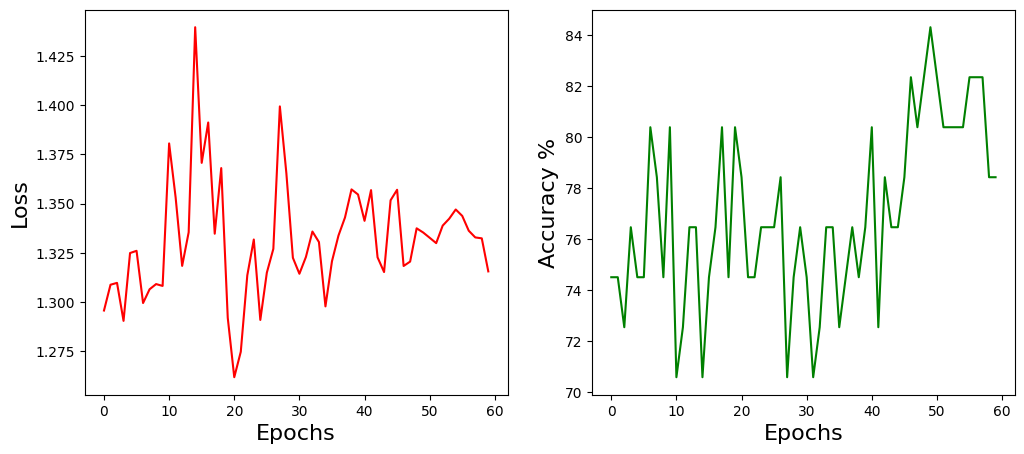

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(test_loss_per_epoch, c='r')
ax[0].set_xlabel('Epochs', fontsize=16)
ax[0].set_ylabel('Loss', fontsize=16)
ax[1].plot(test_accuracy_per_epoch, c='g')
ax[1].set_xlabel('Epochs', fontsize=16)
ax[1].set_ylabel('Accuracy %', fontsize=16)